In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from numpy import percentile
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import power_transform
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error,mean_squared_error
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
av=pd.read_csv('Documents/avocado.csv')

In [102]:
av.head

<bound method NDFrame.head of             Date  AveragePrice  Month  Day
11569 2015-01-04          1.75      1    4
9593  2015-01-04          1.49      1    4
10009 2015-01-04          1.68      1    4
1819  2015-01-04          1.52      1    4
9333  2015-01-04          1.64      1    4
...          ...           ...    ...  ...
8574  2018-03-25          1.36      3   25
9018  2018-03-25          0.70      3   25
18141 2018-03-25          1.42      3   25
17673 2018-03-25          1.70      3   25
8814  2018-03-25          1.34      3   25

[18249 rows x 4 columns]>

In [4]:
av.tail

<bound method NDFrame.tail of        Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13  

In [5]:
av.sample

<bound method NDFrame.sample of        Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13

In [6]:
av.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [7]:
av.shape

(18249, 14)

In [8]:
av.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [9]:
av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [10]:
av.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [11]:
av=pd.DataFrame(data=av)

In [12]:
av

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [13]:
av.isnull()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18245,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18246,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18247,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
av.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [15]:
data=av.drop(['Unnamed: 0'],axis= 1)

In [16]:
data.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


<AxesSubplot:>

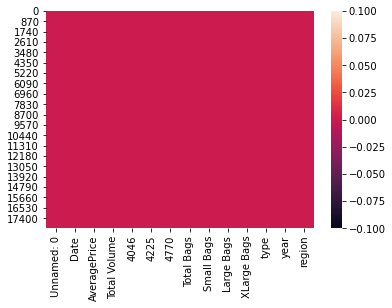

In [17]:
sns.heatmap(av.isnull())

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

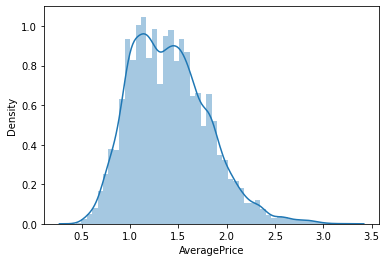

In [18]:
sns.distplot(av['AveragePrice'])

In [19]:
avocado = av.sort_values("Date")

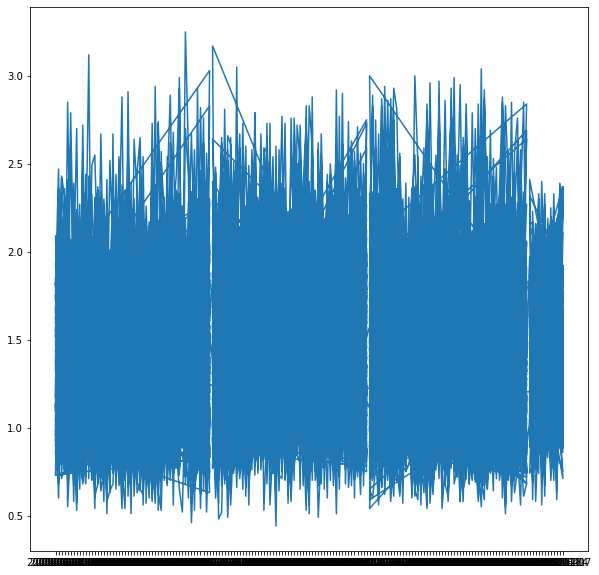

In [20]:
plt.figure(figsize=(10,10))
plt.plot(av['Date'], avocado['AveragePrice'])

In [21]:
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Southeast'),
  Text(1, 0, 'Chicago'),
  Text(2, 0, 'HarrisburgScranton'),
  Text(3, 0, 'Pittsburgh'),
  Text(4, 0, 'Boise'),
  Text(5, 0, 'WestTexNewMexico'),
  Text(6, 0, 'LosAngeles'),
  Text(7, 0, 'LasVegas'),
  Text(8, 0, 'Atlanta'),
  Text(9, 0, 'DallasFtWorth'),
  Text(10, 0, 'MiamiFtLauderdale'),
  Text(11, 0, 'Plains'),
  Text(12, 0, 'StLouis'),
  Text(13, 0, 'Syracuse'),
  Text(14, 0, 'Midsouth'),
  Text(15, 0, 'Sacramento'),
  Text(16, 0, 'Boston'),
  Text(17, 0, 'Charlotte'),
  Text(18, 0, 'Spokane'),
  Text(19, 0, 'Albany'),
  Text(20, 0, 'Houston'),
  Text(21, 0, 'SouthCarolina'),
  Text(22, 0, 'SanFrancisco'),
  Text(23, 0, 'TotalUS'),
  Text(24, 0, 'RaleighGreensboro'),
  Text(25, 0, 'BuffaloRochester'),
  Text(

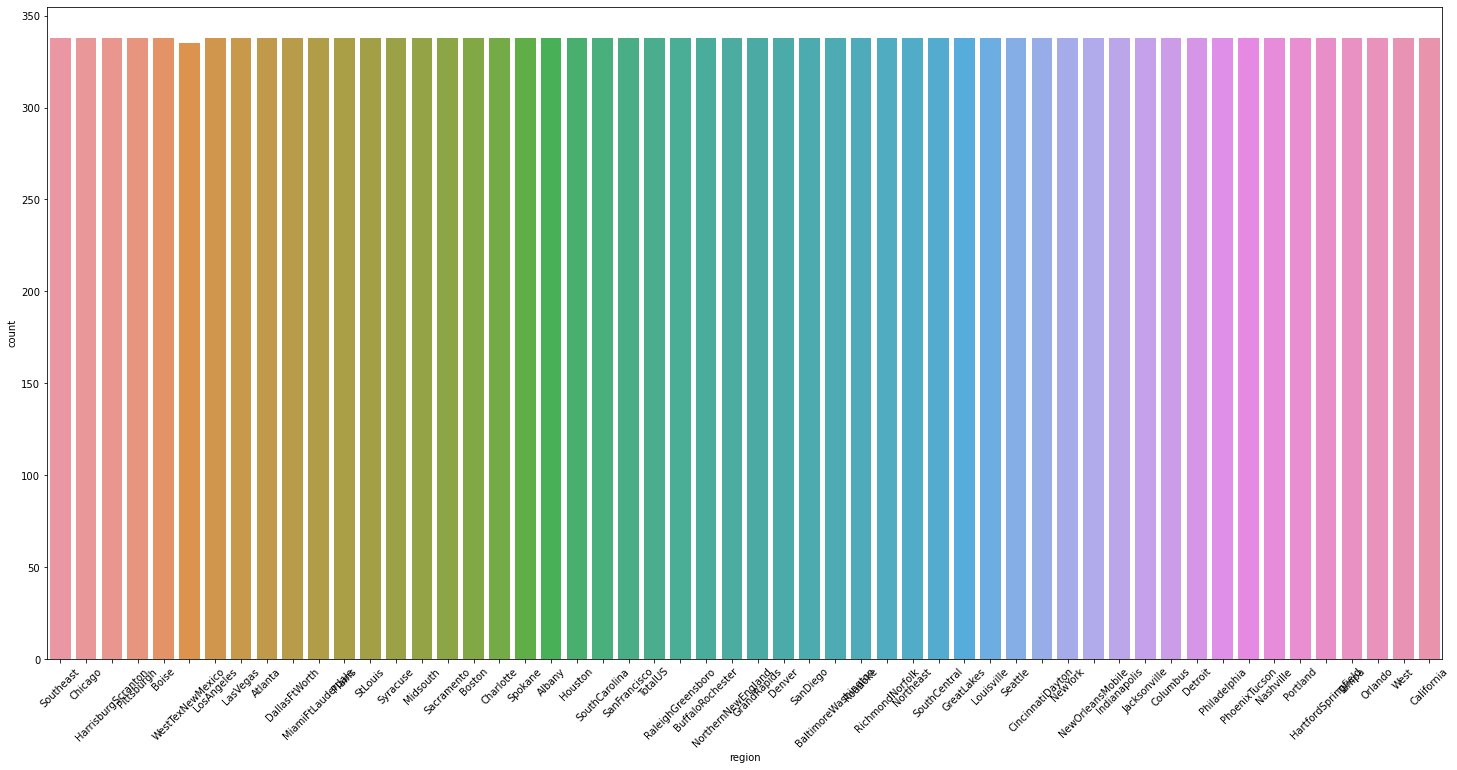

In [22]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data = avocado)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018')])

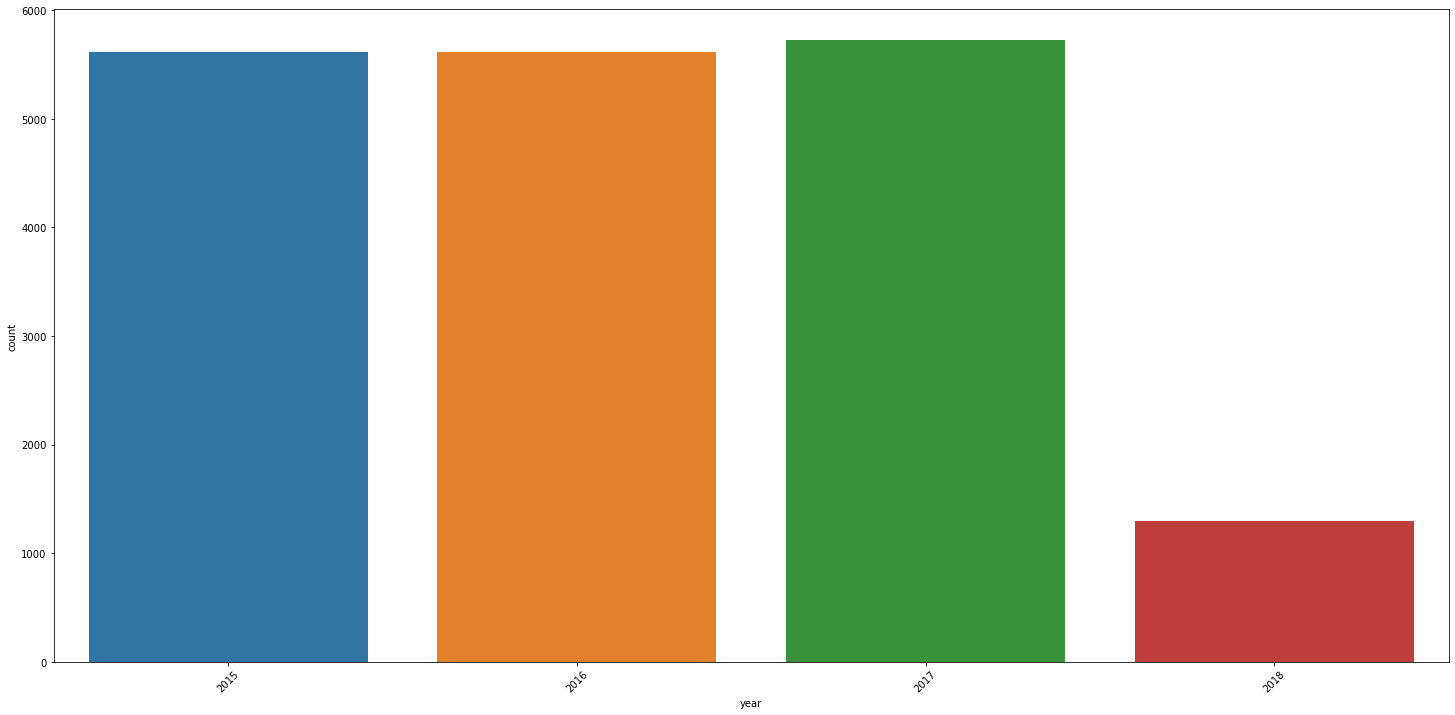

In [23]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'year', data = avocado)
plt.xticks(rotation = 45)

In [24]:
av= avocado[['Date', 'AveragePrice']] 

In [25]:
av

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [31]:
avocado['Date']=pd.to_datetime(avocado['Date'])
avocado['Month']=av['Date'].apply(lambda x:x.month)
avocado['Day']=av['Date'].apply(lambda x:x.day)
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast,1,4
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago,1,4
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton,1,4
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh,1,4
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise,1,4


Text(0.5, 1.0, 'Average Price')

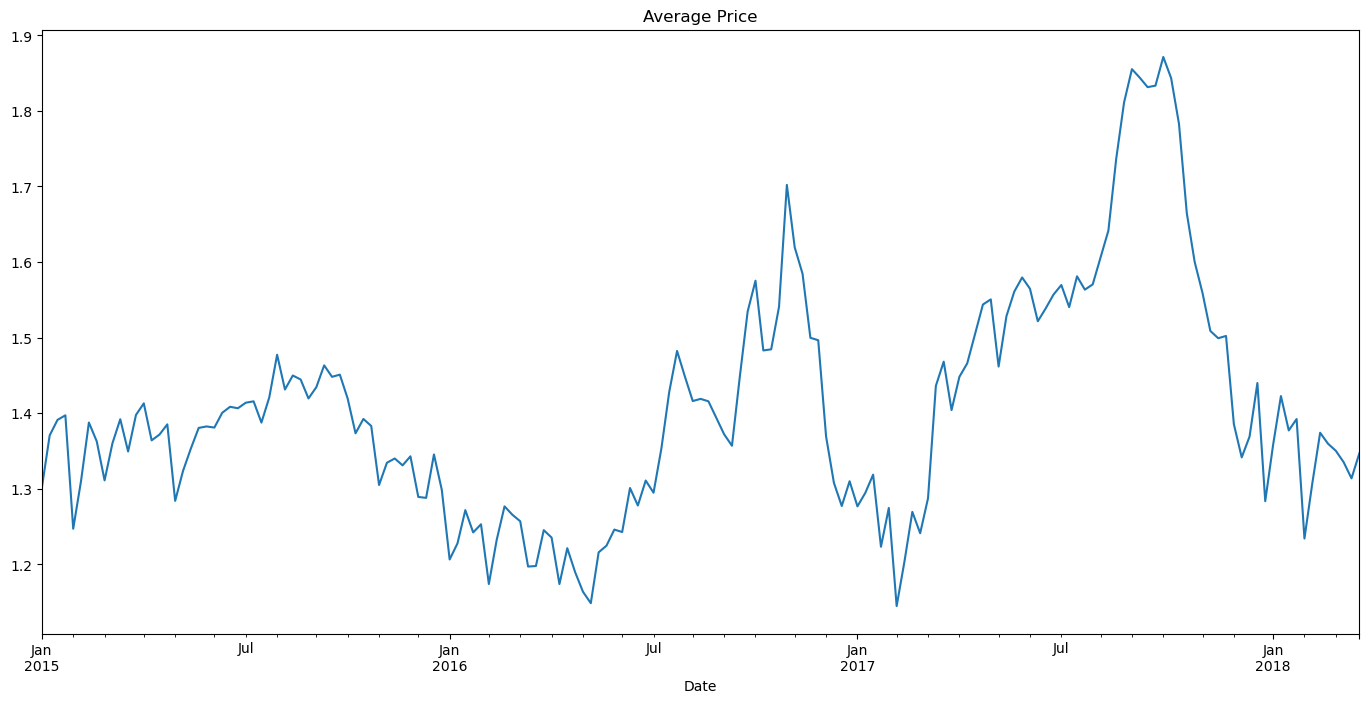

In [32]:

Date=avocado.groupby('Date').mean()
plt.figure(figsize=(17,8),dpi=100)
Date['AveragePrice'].plot()
plt.title('Average Price')

Text(0.5, 1.0, 'Average Price Per Month')

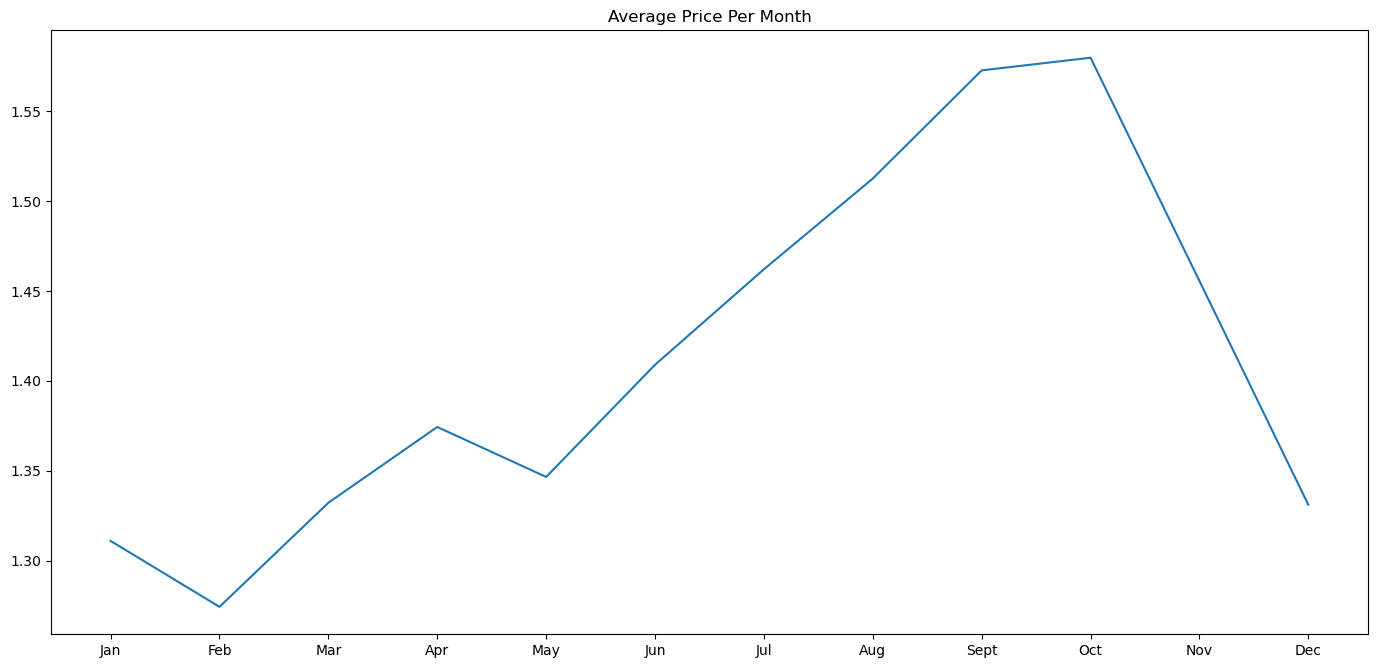

In [33]:
Month = avocado.groupby("Month").mean()
plt.figure(figsize=(17,8),dpi=100)
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"],Month['AveragePrice'])
plt.title('Average Price Per Month')

Text(0.5, 1.0, 'Average Price Per Day')

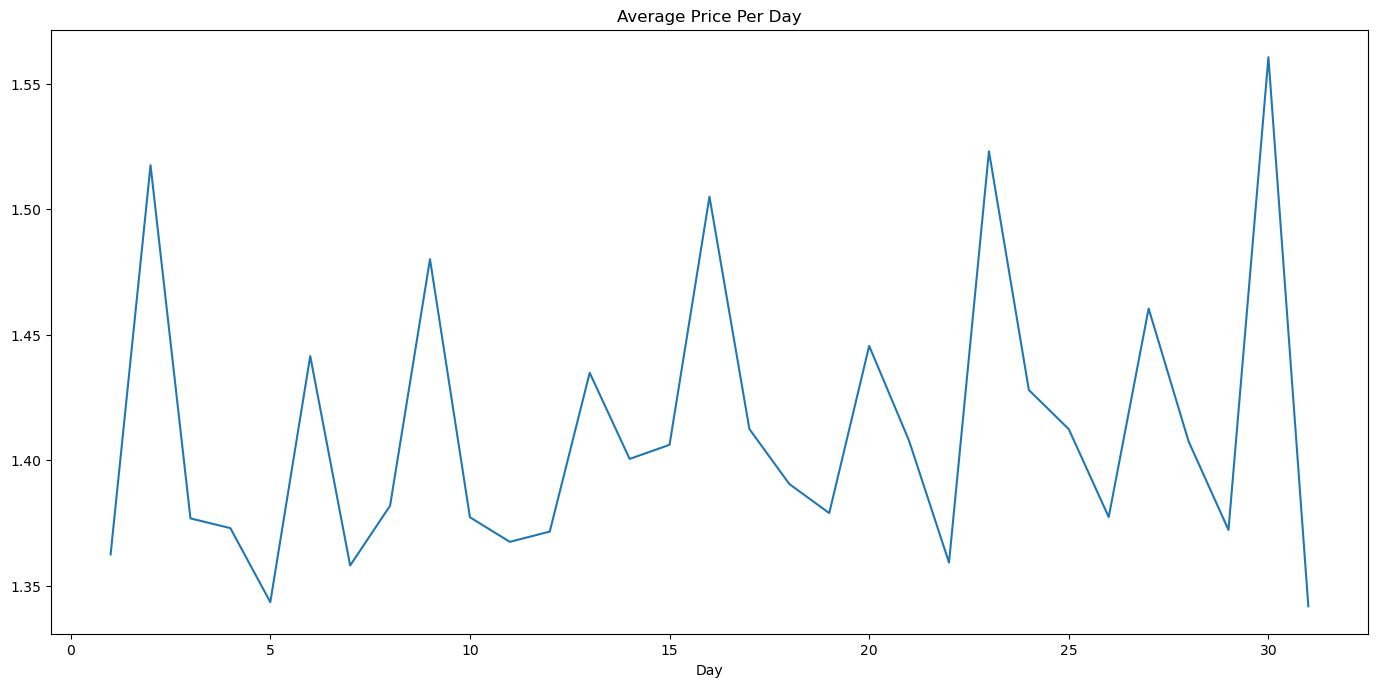

In [34]:
Day = avocado.groupby("Day").mean()
plt.figure(figsize=(17,8),dpi=100)
Day['AveragePrice'].plot()
plt.title('Average Price Per Day')

Text(0.5, 1.0, 'Average Price According to Region')

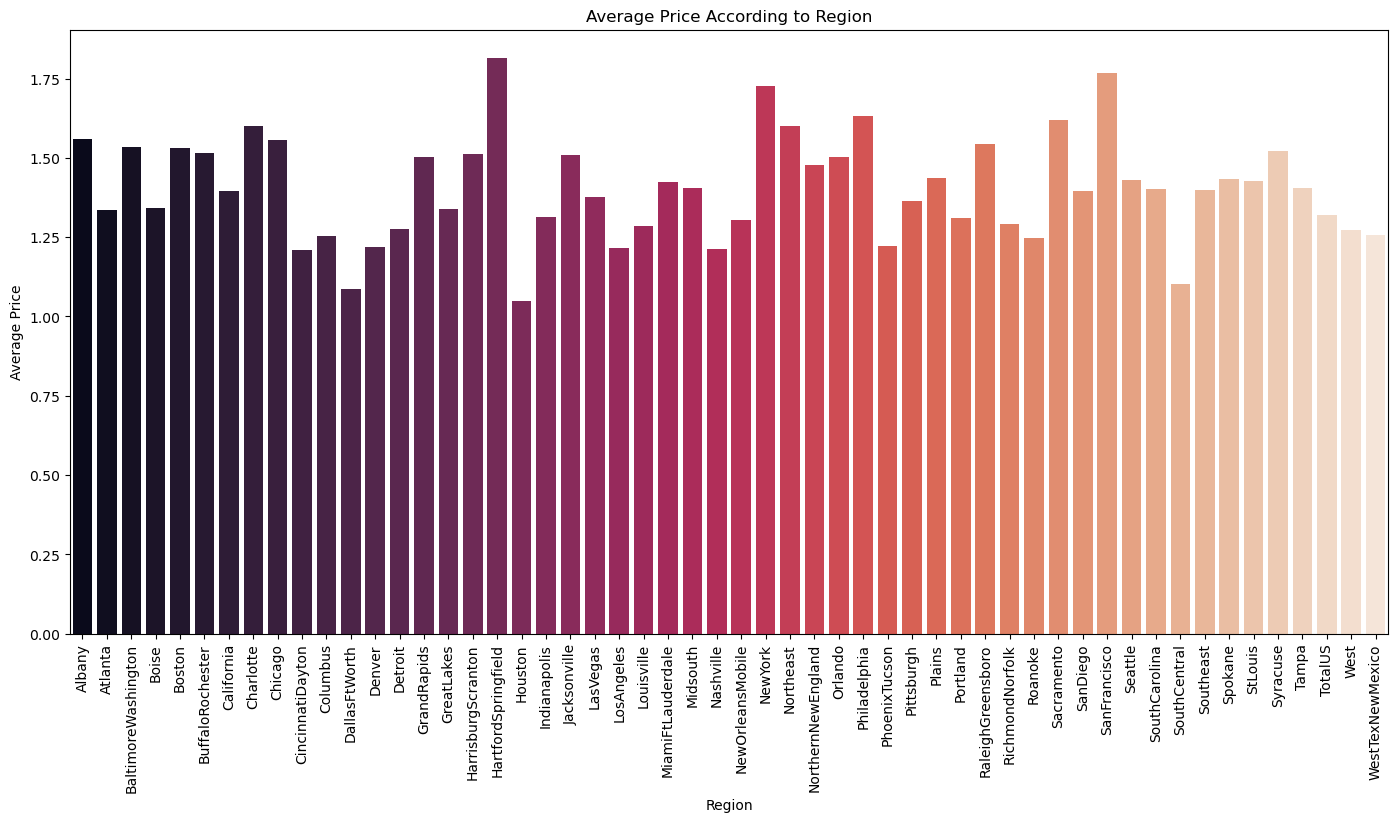

In [100]:
Region=avocado.groupby('region').mean()
Region.sort_values(by=['AveragePrice'], ascending=False, inplace=True)
plt.figure(figsize=(17,8),dpi=100)
sns.barplot(x = Region.index,y=Region["AveragePrice"],data = Region,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

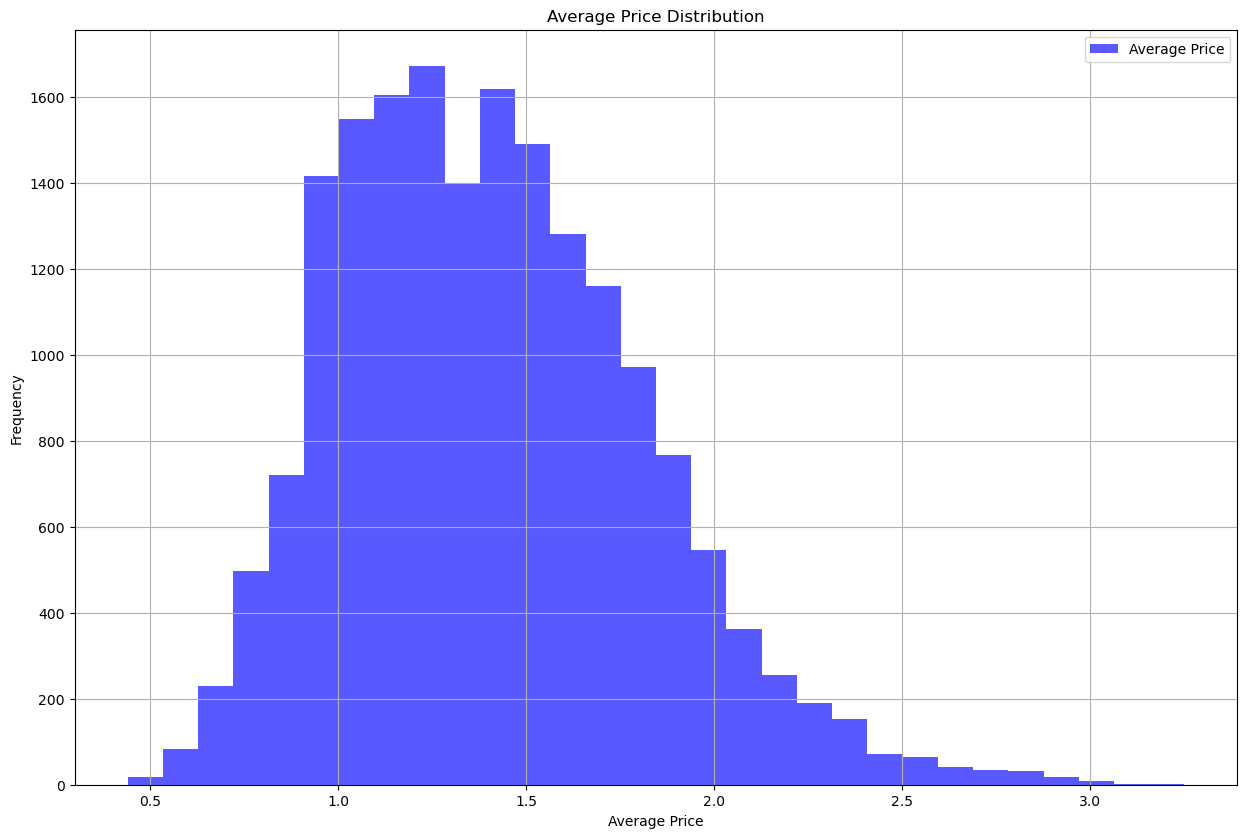

In [35]:
plt.figure(figsize=(15,10),dpi=100)
avocado["AveragePrice"].plot(kind="hist",color="blue",bins=30,grid=True,alpha=0.65,label="Average Price")
plt.legend()
plt.xlabel("Average Price")
plt.title("Average Price Distribution")
plt.show()

<AxesSubplot:>

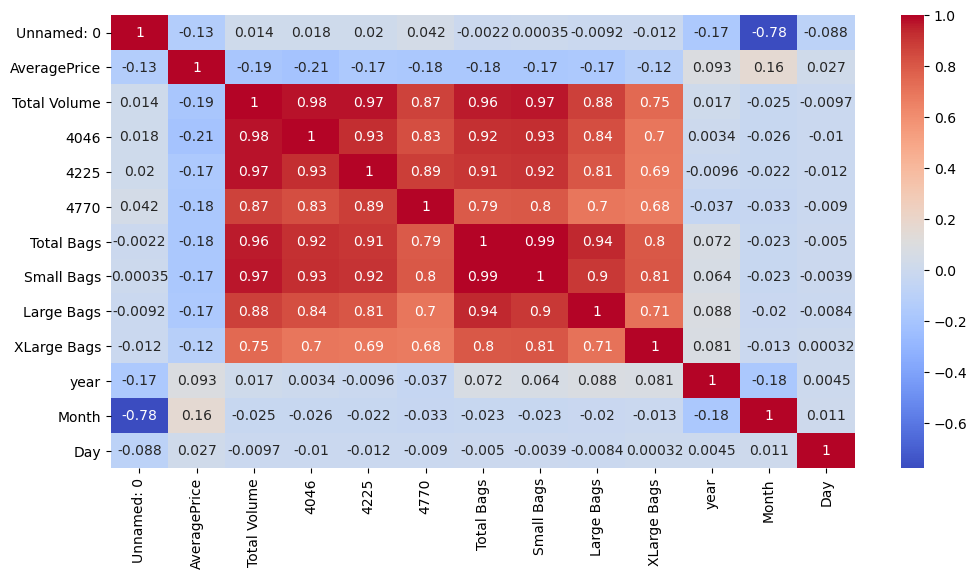

In [36]:
corr_df = avocado.corr(method='pearson')
plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(corr_df,cmap='coolwarm',annot=True)

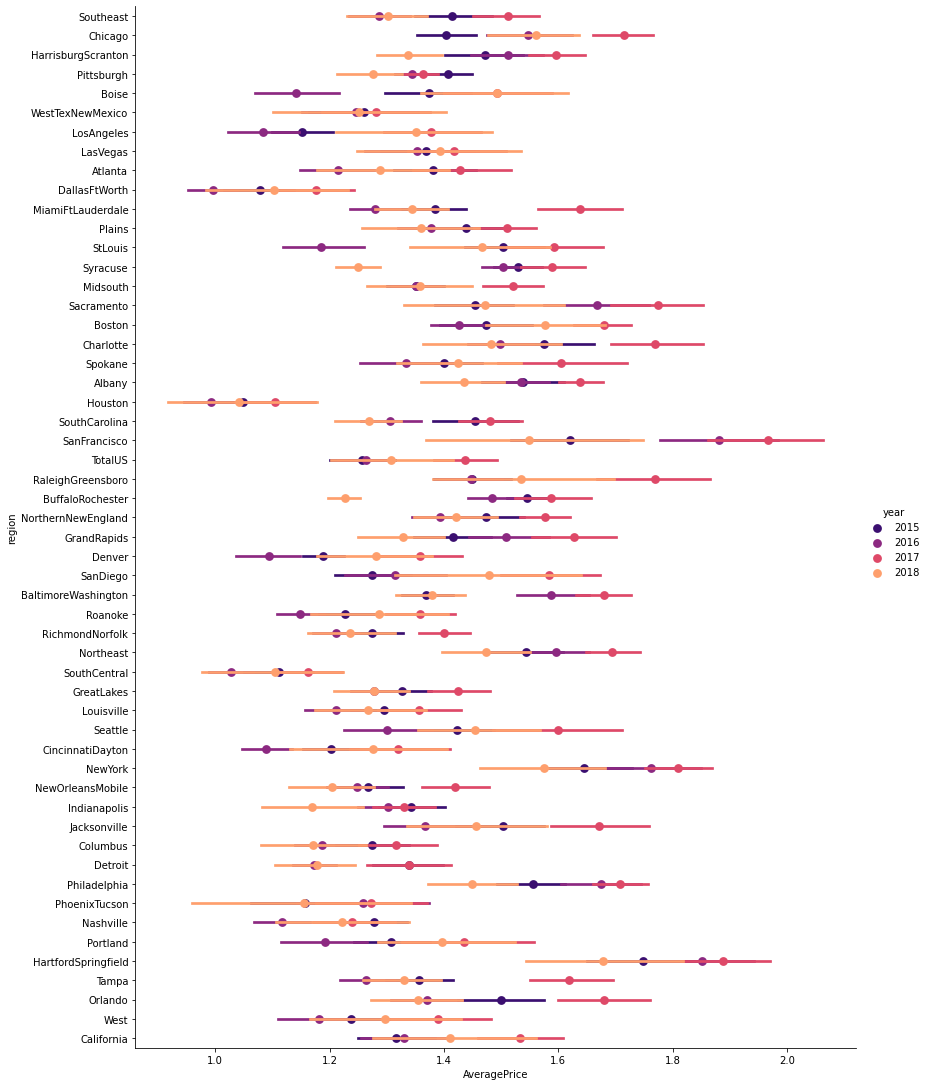

In [45]:
sns.factorplot('AveragePrice','region',data=avocado,
                   hue='year',
                   aspect=0.8,
                   height=15,
                   palette='magma',
                   join=False,
              )

In [49]:
avocado_vif = avocado.copy()
avocado_vif.drop(columns=['Date','type','region'],inplace = True)



Xf = add_constant(avocado_vif)
pd.Series([variance_inflation_factor(Xf.values, i) 
               for i in range(Xf.shape[1])], 
              index=Xf.columns)

const           6.767191e+06
Unnamed: 0      3.464368e+00
AveragePrice    1.104576e+00
Total Volume    4.919762e+09
4046            6.600611e+08
4225            5.980690e+08
4770            4.763777e+06
Total Bags      2.370316e+14
Small Bags      1.364727e+14
Large Bags      1.448103e+13
XLarge Bags     7.622303e+10
year            1.467652e+00
Month           3.515864e+00
Day             1.023072e+00
dtype: float64

<AxesSubplot:>

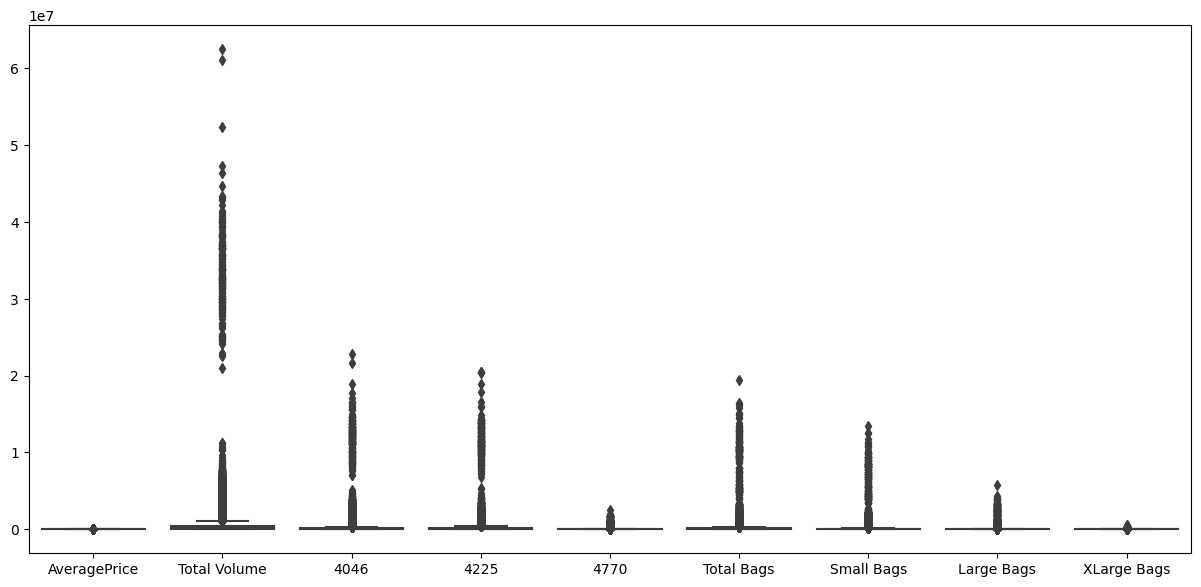

In [50]:
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = avocado[[
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']])

In [51]:
avocado.drop(columns=["Date"],inplace=True)
avocado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 11569 to 8814
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
 13  Month         18249 non-null  int64  
 14  Day           18249 non-null  int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 2.7+ MB


In [54]:
columns = avocado.columns
for j in columns:
    if isinstance(avocado[j][0], str) :
        continue
    else:
        
        quartiles = percentile(avocado[j], [25,75])
        
        lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
        upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
        avocado[j] = avocado[j].apply(lambda x: upper_fence if x > upper_fence else (lower_fence if x < lower_fence else x))

In [55]:
avocado.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
11569,51,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast,1,4
9593,51,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago,1,4
10009,51,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton,1,4
1819,51,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh,1,4
9333,51,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise,1,4


<AxesSubplot:>

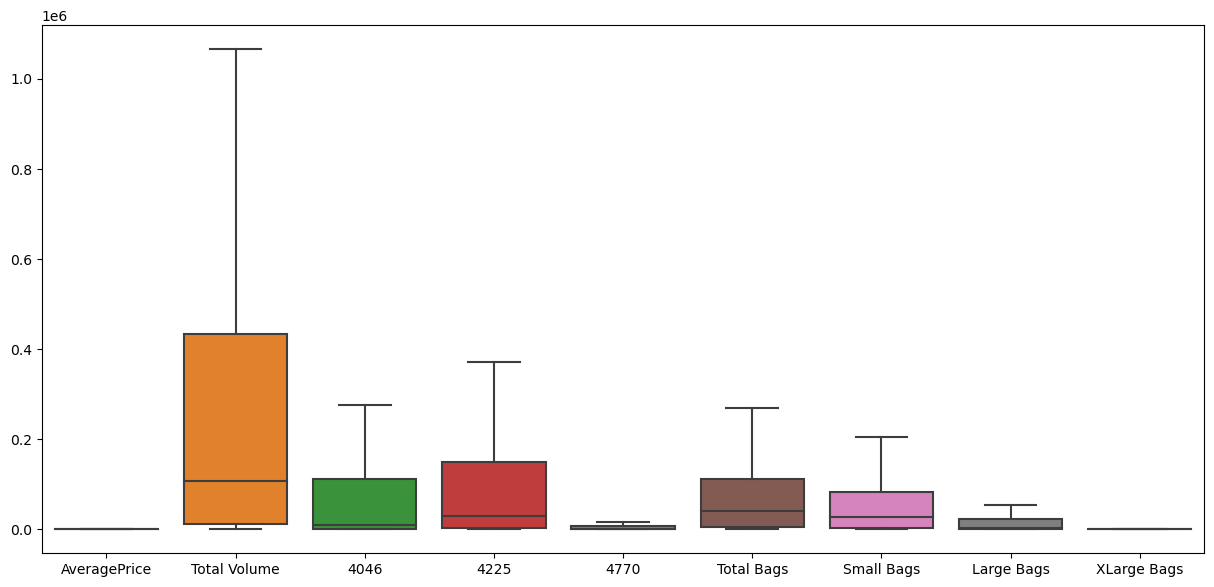

In [56]:
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = avocado[[
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']])

In [58]:
data['Date'] = pd.to_datetime(data['Date'])

In [59]:
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

In [60]:
data['season'] = data.Date.map(season_of_date)

In [61]:
data.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,region,Month,Day,season
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,organic,2015,Southeast,1,4,winter
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,organic,2015,Chicago,1,4,winter
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,organic,2015,HarrisburgScranton,1,4,winter
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,conventional,2015,Pittsburgh,1,4,winter
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,organic,2015,Boise,1,4,winter
2807,51,2015-01-04,0.75,758118.95,426878.87,147958.43,15267.89,168013.76,165202.22,2811.54,conventional,2015,WestTexNewMexico,1,4,winter
1195,51,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,conventional,2015,LosAngeles,1,4,winter
10269,51,2015-01-04,1.50,6329.83,3730.80,2141.91,0.00,457.12,426.67,30.45,organic,2015,LasVegas,1,4,winter
103,51,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,conventional,2015,Atlanta,1,4,winter
1143,51,2015-01-04,0.80,317861.35,134003.07,120628.37,4591.23,58638.68,58126.59,512.09,conventional,2015,LasVegas,1,4,winter


In [62]:
data.season.value_counts()

winter    5400
summer    4319
spring    4319
autumn    4211
Name: season, dtype: int64

In [63]:
data = data.drop(['Date'],axis = 1)

In [82]:
label_cols = ['type','region','season']

label = LabelEncoder()
data[label_cols] = data[label_cols].apply(lambda x : label.fit_transform(x))

In [83]:
scale_cols = data.drop(['AveragePrice','type','year','region','season'],axis=1)
col_trans = make_column_transformer(
            (OneHotEncoder(), data[label_cols].columns),
            (StandardScaler(), scale_cols.columns),
            remainder = 'passthrough')

In [84]:
X = data.drop(['AveragePrice'],axis=1)
y = data.AveragePrice
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [85]:
linreg = LinearRegression()
pipe = make_pipeline(col_trans,linreg)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['type', 'region', 'season'], dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['Unnamed: 0', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'Month', 'Day'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])

In [74]:
y_pred_test = pipe.predict(X_test)

In [76]:
print('MAE for testing set: {}'.format(mean_absolute_error(y_pred_test,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(y_pred_test,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(y_pred_test,y_test))))

MAE for testing set: 0.19230080867291904
MSE for testing set: 0.06358396026193262
RMSE for testing set: 0.25215860140382407


In [79]:
svr = SVR()
pipe = make_pipeline(col_trans,svr)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['type', 'region', 'season'], dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['Unnamed: 0', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'Month', 'Day'],
      dtype='object'))])),
                ('svr', SVR())])

In [80]:
y_pred_test = pipe.predict(X_test)

In [86]:
print('MAE for testing set: {}'.format(mean_absolute_error(y_pred_test,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(y_pred_test,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(y_pred_test,y_test))))

MAE for testing set: 0.3212518786626803
MSE for testing set: 0.16301029241855022
RMSE for testing set: 0.40374533114148853


In [89]:
dr=DecisionTreeRegressor()
pipe = make_pipeline(col_trans,dr)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['type', 'region', 'season'], dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['Unnamed: 0', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'Month', 'Day'],
      dtype='object'))])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [90]:
y_pred_test = pipe.predict(X_test)

In [91]:
print('MAE for testing set: {}'.format(mean_absolute_error(y_pred_test,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(y_pred_test,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(y_pred_test,y_test))))

MAE for testing set: 0.11631506849315067
MSE for testing set: 0.03454052054794521
RMSE for testing set: 0.18585080184907787


In [92]:
forest_model = RandomForestRegressor()
pipe = make_pipeline(col_trans,forest_model)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  Index(['type', 'region', 'season'], dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['Unnamed: 0', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'Month', 'Day'],
      dtype='object'))])),
                ('randomforestregressor', RandomForestRegressor())])

In [93]:
y_pred_test = pipe.predict(X_test)

In [94]:
print('MAE for testing set: {}'.format(mean_absolute_error(y_pred_test,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(y_pred_test,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(y_pred_test,y_test))))

MAE for testing set: 0.08420317808219177
MSE for testing set: 0.015093190898630135
RMSE for testing set: 0.12285434830981821


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

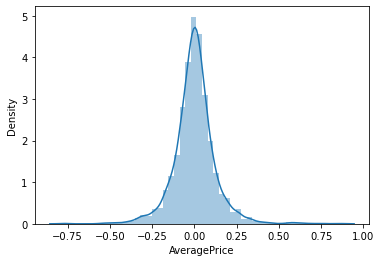

In [97]:
sns.distplot((y_test-y_pred_test),bins=50)

As per our conclusion random forest model as the best suited model for our purpose of predicting region and average avocado prices.